# Pacmann Project - SQL & Data Wrangling

### Background

E-commerce sebagai tempat untuk berbelanja tentunya memiliki banyak transaksi setiap harinya. Data dari transaksi yang terjadi ini tentunya dapat menjadi sesuatu yang berharga bagi perusahaan e-commerce dalam memaksimalkan keuntungan perusahaan. Data analyst memiliki peran yang penting untuk melakukan pemrosesan data mentah menjadi data yang baik untuk dianalisa. Melalui project ini diharapkan dapat dilakukan analisa atas data e-commerce yang tersimpan di database relational. 

### Objective

Tujuan dari analisa data ini adalah mengetahui:
* Bagaimana tren penjualan
* Wilayah mana yang paling banyak melakukan penjualan
* Kapan penjualan paling banyak terjadi
* Jenis pembayaran apa yang paling sering digunakan
* Bagaimana kepuasan customer per wilayah

### Accessing Database

In [427]:
# import library yang dibutuhkan untuk analisa data
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

In [428]:
# membuat path file
dbfile = 'olist.db'

# membuat koneksi SQL ke SQLite database
con = sqlite3.connect(dbfile)

# membuat cursor
cur = con.cursor()

# menampilkan nama tabel
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [429]:
# membaca tabel yang dibutuhkan ke dalam dataframe
order_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
order_reviews = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
order_payments = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)

### Data Preparation

#### Combining the Data

In [430]:
# menggabungkan data menjadi satu dataframe
join_orders_1 = pd.merge(order, order_customer, how='left', on = 'customer_id')
join_orders_2 = pd.merge(join_orders_1, order_reviews, how='left', on = 'order_id')
join_orders_3 = pd.merge(join_orders_2, order_payments, how='left', on = 'order_id')

In [431]:
# melakukan pengecekan kolom setelah data digabungkan
list(join_orders_3)

['index_x',
 'order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'index_y',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'index_x',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'index_y',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

In [432]:
# drop kolom yang tidak dibutuhkan
join_orders = join_orders_3.drop([
    'index_x',
    'customer_id',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'index_y',
    'customer_zip_code_prefix',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp'], axis=1)

join_orders

,order_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
104473,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,1.0,credit_card,3.0,85.08
104474,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,1.0,credit_card,3.0,195.00
104475,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,371579771219f6db2d830d50805977bb,5.0,1.0,credit_card,5.0,271.01
104476,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,1.0,credit_card,4.0,441.16


#### Cleaning the Data

In [433]:
# menghapus data yang duplikat
join_orders = join_orders[~join_orders.duplicated(keep='first')]
join_orders

,order_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
104473,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,1.0,credit_card,3.0,85.08
104474,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,1.0,credit_card,3.0,195.00
104475,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,371579771219f6db2d830d50805977bb,5.0,1.0,credit_card,5.0,271.01
104476,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,1.0,credit_card,4.0,441.16


In [434]:
# mengecek null value pada dataframe
join_orders.isna().sum()

order_id                      0
order_status                  0
order_purchase_timestamp      0
customer_unique_id            0
customer_city                 0
customer_state                0
review_id                   800
review_score                800
payment_sequential            1
payment_type                  1
payment_installments          1
payment_value                 1
dtype: int64

In [435]:
# mengecek null value pada dataframe
join_orders[join_orders['payment_sequential'].isna()]

,order_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
32304,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,NaN,NaN,NaN


In [436]:
# menghapus null value
join_orders= join_orders[~join_orders['payment_sequential'].isna()]
join_orders.isna().sum()

# missing value pada kolom review akan dihandle nanti pada saat analisa terhadap review

order_id                      0
order_status                  0
order_purchase_timestamp      0
customer_unique_id            0
customer_city                 0
customer_state                0
review_id                   800
review_score                800
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
dtype: int64

#### Parsing Dates

In [437]:
join_orders['order_purchase_timestamp'] = join_orders['order_purchase_timestamp'].astype('datetime64[ns]')

join_orders['purchase_hour'] = join_orders['order_purchase_timestamp'].dt.hour
join_orders['purchase_day'] = join_orders['order_purchase_timestamp'].dt.day
join_orders['purchase_day_week'] = join_orders['order_purchase_timestamp'].dt.dayofweek
join_orders['purchase_month'] = join_orders['order_purchase_timestamp'].dt.month
join_orders['purchase_year'] = join_orders['order_purchase_timestamp'].dt.year

#### Rename Dataframe

In [438]:
df = join_orders

### Data Exploration

##### Tren Transaksi

In [439]:
tren_order = df[df['order_status'] == 'delivered'].groupby(['purchase_year'])['order_id'].nunique()
tren_payment = df[df['order_status'] == 'delivered'].groupby(['purchase_year'])['payment_value'].sum()

Text(0.5, 1.0, 'Tren Jumlah Pendapatan')

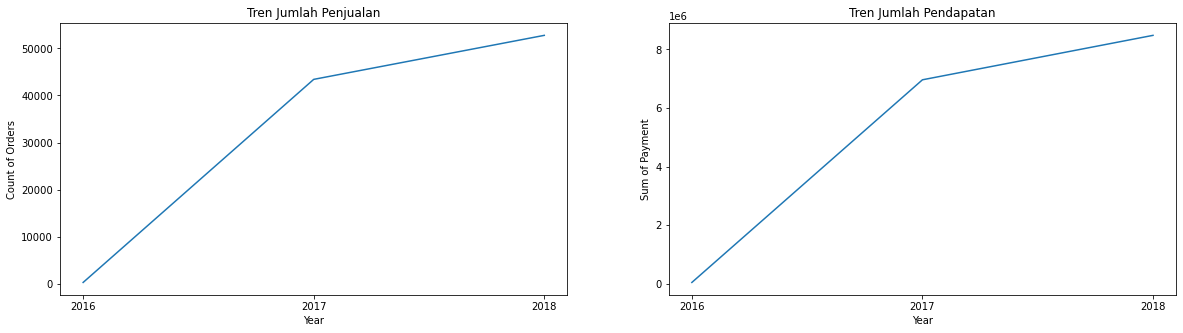

In [440]:
plt.subplot(1,2,1)
ax = tren_order.plot(kind='line', figsize=(20,5), xticks=(2016,2017,2018))
ax. set_xlabel('Year')
ax.set_ylabel('Count of Orders')
plt.title('Tren Jumlah Penjualan')

plt.subplot(1,2,2)
ax = tren_payment.plot(kind='line', figsize=(20,5), xticks=(2016,2017,2018))
ax.set_xlabel('Year')
ax.set_ylabel('Sum of Payment')
plt.title('Tren Jumlah Pendapatan')

Tren dari jumlah penjualan meningkat dari tahun 2016-2018. Seiring dengan peningkatan jumlah penjualan, jumlah pendapatan juga mengalami kenaikan.

##### Penjualan per Wilayah

In [441]:
wilayah_order = df[df['order_status'] == 'delivered'].groupby(['customer_state'])['order_id'].nunique().sort_values(ascending=False).head(10)
wilayah_payment = df[df['order_status'] == 'delivered'].groupby(['customer_state'])['payment_value'].sum().sort_values(ascending=False).head(10)
city_order = df[df['order_status'] == 'delivered'].groupby(['customer_city'])['order_id'].nunique().sort_values(ascending=False).head(10)
city_payment = df[df['order_status'] == 'delivered'].groupby(['customer_city'])['payment_value'].sum().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Jumlah Pendapatan per City')

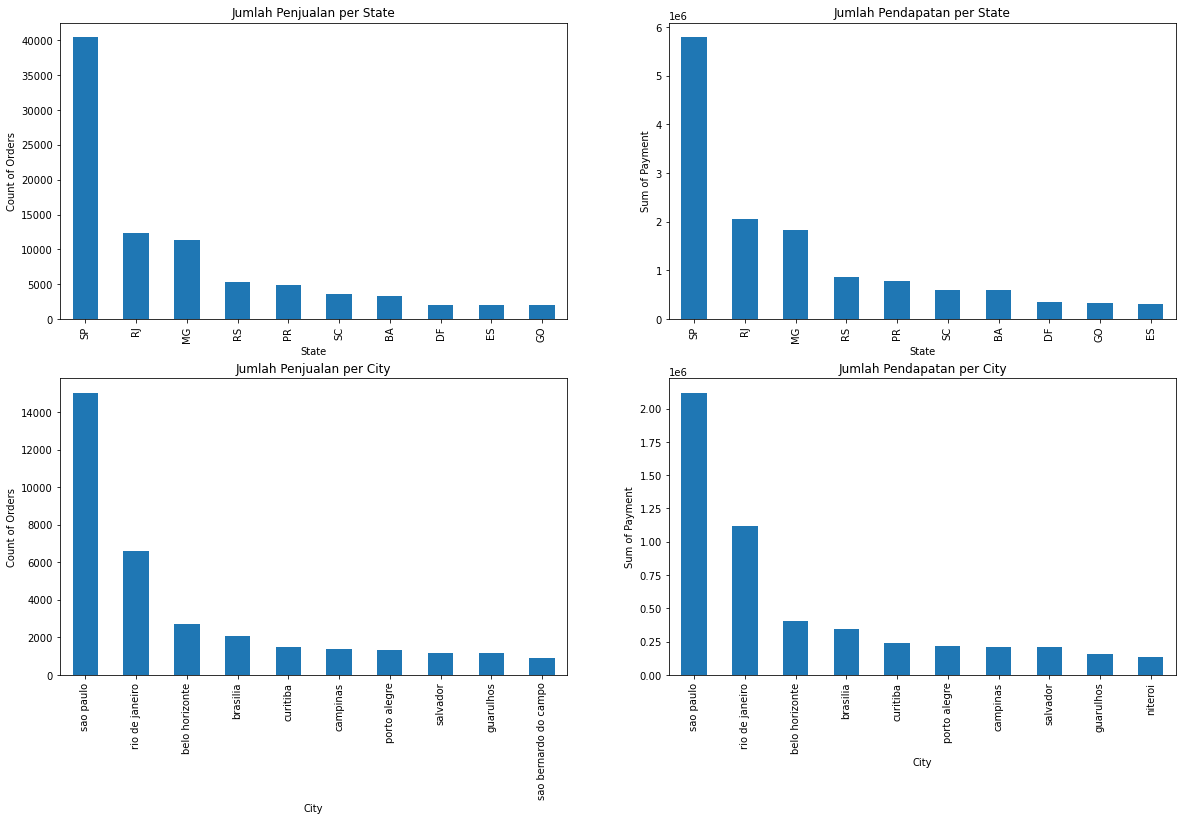

In [442]:
plt.subplot(2,2,1)
ax = wilayah_order.plot(kind='bar', figsize=(20,12))
ax.set_xlabel('State')
ax.set_ylabel('Count of Orders')
plt.title('Jumlah Penjualan per State')

plt.subplot(2,2,2)
ax = wilayah_payment.plot(kind='bar', figsize=(20,12))
ax.set_xlabel('State')
ax.set_ylabel('Sum of Payment')
plt.title('Jumlah Pendapatan per State')

plt.subplot(2,2,3)
ax = city_order.plot(kind='bar', figsize=(20,12))
ax.set_xlabel('City')
ax.set_ylabel('Count of Orders')
plt.title('Jumlah Penjualan per City')

plt.subplot(2,2,4)
ax = city_payment.plot(kind='bar', figsize=(20,12))
ax.set_xlabel('City')
ax.set_ylabel('Sum of Payment')
plt.title('Jumlah Pendapatan per City')

Penjualan terbanyak ada pada state SP, disusul dengan RJ dan MG, sedangkan untuk kota dengan penjualan terbanyak ada pada Sao Paulo, Rio de Janeiro dan Belo Horizonte.

##### Waktu Penjualan

In [443]:
order_per_hour = df.groupby(['purchase_hour'])['order_id'].nunique()
order_per_day = df.groupby(['purchase_day'])['order_id'].nunique()
order_per_day_week = df.groupby(['purchase_day_week'])['order_id'].nunique()
order_per_month = df.groupby(['purchase_month'])['order_id'].nunique()

Text(0.5, 1.0, 'Penjualan dalam Bulan')

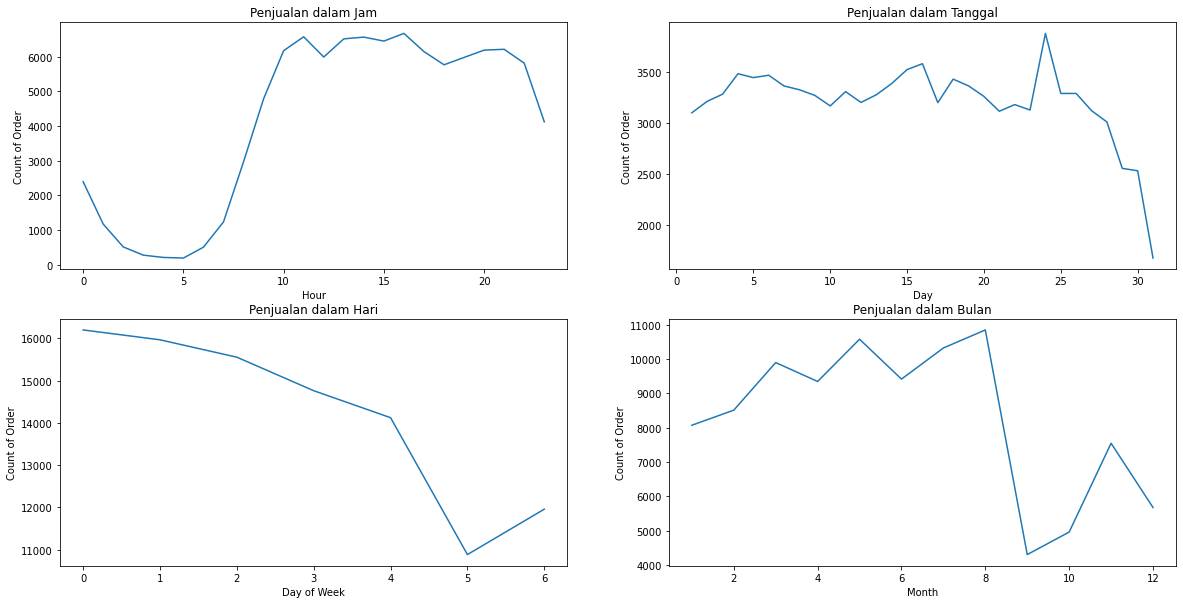

In [444]:
plt.subplot(2,2,1)
ax = order_per_hour.plot(figsize=(20, 10))
ax.set_xlabel('Hour')
ax.set_ylabel('Count of Order')
plt.title('Penjualan dalam Jam')

plt.subplot(2,2,2)
ax = order_per_day.plot(figsize=(20, 10))
ax.set_xlabel('Day')
ax.set_ylabel('Count of Order')
plt.title('Penjualan dalam Tanggal')

plt.subplot(2,2,3)
ax = order_per_day_week.plot(figsize=(20, 10))
ax.set_xlabel('Day of Week')
ax.set_ylabel('Count of Order')
plt.title('Penjualan dalam Hari')

plt.subplot(2,2,4)
ax = order_per_month.plot(figsize=(20, 10))
ax.set_xlabel('Month')
ax.set_ylabel('Count of Order')
plt.title('Penjualan dalam Bulan')

Penjualan relatif tinggi terjadi pada waktu-waktu berikut:
* Pada pukul 10.00-15.00
* Pada awal bulan hingga puncaknya di tanggal 23-24
* Pada hari minggu
* Pada bulan Agustus

##### Jenis Pembayaran

In [445]:
payment_method = df.groupby(['payment_type'])['order_id'].count()

<AxesSubplot:xlabel='payment_type'>

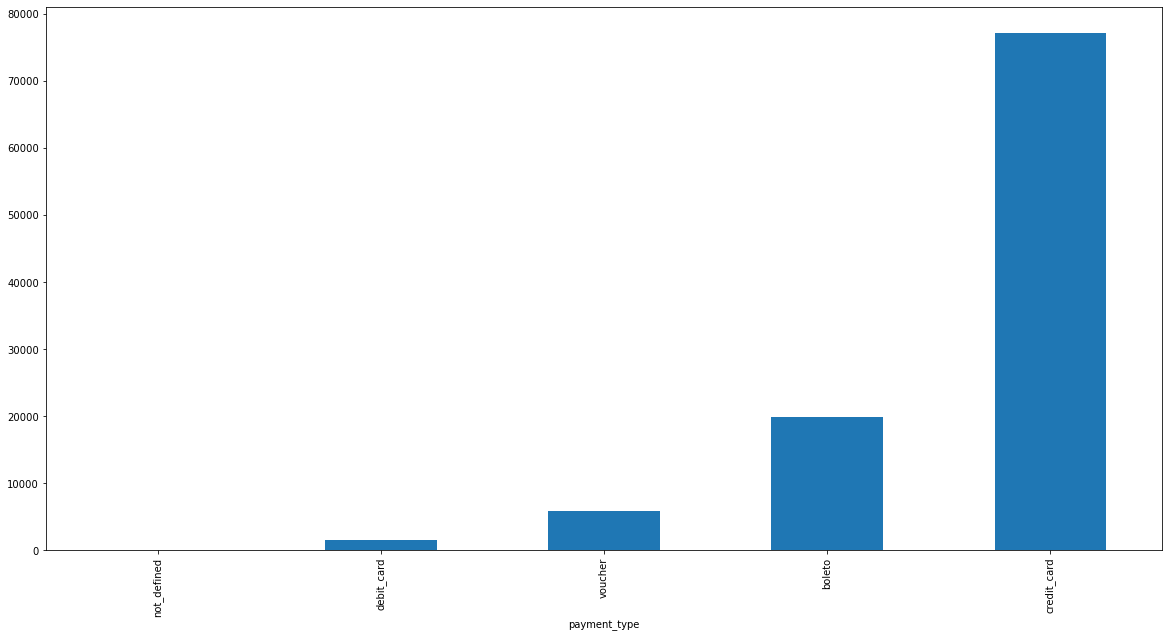

In [446]:
payment_method.sort_values().plot(kind='bar', figsize=(20,10))

Pembayaran dilakukan paling banyak menggunakan credit card

##### Kepuasan Customer

In [447]:
df_review = join_orders_2.drop([
    'index_x',
    'customer_id',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'index_y',
    'customer_zip_code_prefix',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp'], axis=1)

df_review

,order_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,index,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,32790.0,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,29158.0,8d5266042046a06655c8db133d120ba5,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,4323.0,e73b67b67587f7644d5bd1a52deb1b01,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,77520.0,359d03e676b3c069f62cadba8dd3f6e8,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,54136.0,e50934924e227544ba8246aeb3770dd4,5.0
...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,48684.0,e262b3f92d1ce917aa412a9406cf61a6,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,55670.0,29bb71b2760d0f876dfa178a76bc4734,4.0
99989,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,43847.0,371579771219f6db2d830d50805977bb,5.0
99990,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,6784.0,8ab6855b9fe9b812cd03a480a25058a1,2.0


In [448]:
# menghapus data yang duplikat
df_review = df_review[~df_review.duplicated(keep='first')]

# menghapus null value
df_review= df_review[~df_review['review_id'].isna()]
df_review.isna().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_city               0
customer_state              0
index                       0
review_id                   0
review_score                0
dtype: int64

In [449]:
df_review['review_score'].mean()

4.08642062404257

In [450]:
high_review_state = df_review.groupby(['customer_state'])['review_score'].mean().sort_values(ascending=False).head(10)
high_review_city = df_review.groupby(['customer_city'])['review_score'].mean().sort_values(ascending=False).head(10)
low_review_state = df_review.groupby(['customer_state'])['review_score'].mean().sort_values(ascending=False).tail(10)
low_review_city = df_review.groupby(['customer_city'])['review_score'].mean().sort_values(ascending=False).tail(10)

Text(0.5, 1.0, 'City dengan review terendah')

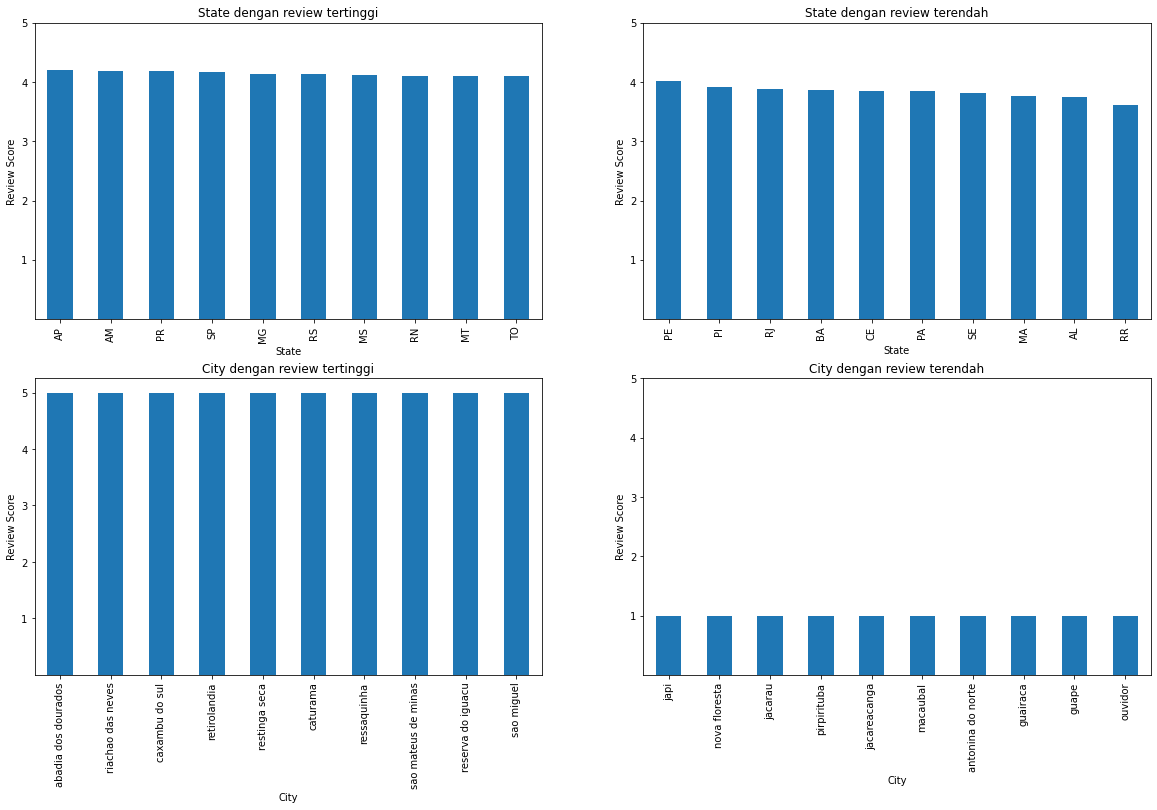

In [451]:
plt.subplot(2,2,1)
ax = high_review_state.plot(kind='bar', figsize=(20,12), yticks=(1,2,3,4,5))
ax.set_xlabel('State')
ax.set_ylabel('Review Score')
plt.title('State dengan review tertinggi')

plt.subplot(2,2,2)
ax = low_review_state.plot(kind='bar', figsize=(20,12), yticks=(1,2,3,4,5))
ax.set_xlabel('State')
ax.set_ylabel('Review Score')
plt.title('State dengan review terendah')

plt.subplot(2,2,3)
ax = high_review_city.plot(kind='bar', figsize=(20,12), yticks=(1,2,3,4,5))
ax.set_xlabel('City')
ax.set_ylabel('Review Score')
plt.title('City dengan review tertinggi')

plt.subplot(2,2,4)
ax = low_review_city.plot(kind='bar', figsize=(20,12), yticks=(1,2,3,4,5))
ax.set_xlabel('City')
ax.set_ylabel('Review Score')
plt.title('City dengan review terendah')

Pada level state, rata-rata review masih terbilang cukup baik di mana seluruh state ada di atas 3.5. Sementara di level city masih cukup banyak yang memiliki rata-rata review di angka 1